In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import joblib

In [5]:
# read fold for check
f1 = pd.read_csv("../kitt/f1.csv")
f2 = pd.read_csv("../kitt/f2.csv")
f3 = pd.read_csv("../kitt/f3.csv")
f4 = pd.read_csv("../kitt/f4.csv")
f5 = pd.read_csv("../kitt/f5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [6]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [8]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print("y_f1:", le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print("y_f2:",le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print("y_f3:",le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print("y_f4:",le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print("y_f5:",le.classes_)

y_f1: ['B' 'M']
y_f2: ['B' 'M']
y_f3: ['B' 'M']
y_f4: ['B' 'M']
y_f5: ['B' 'M']


In [9]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 34
f1 negative: 57
------------------
f2 positive: 34
f2 negative: 57
------------------
f3 positive: 34
f3 negative: 57
------------------
f4 positive: 34
f4 negative: 57
------------------
f5 positive: 34
f5 negative: 57
------------------


# Function

In [10]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1


In [11]:
def cal_score_all(cm_val):
    sen_val = sensitivity(cm_val)
    spec_val = specificity(cm_val)
    acc_val = accuracy(cm_val)
    pre_val = precision(cm_val)
    f1_score_val = f1(cm_val)

In [12]:
def plot_cm(cm_val, save=False, which="-"):
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title(which, fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black",
                   fontsize=20)
    if save is not False:
        save_path = '{}_{}.png'.format(split)
        plt.savefig(save_path)
        print("Save fig at {}".format(save_path))
    plt.show()

In [13]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
    
def thresholding(y_val, y_pred_val):
    fpr, tpr, thresholds = metrics.roc_curve(y_val,  y_pred_val[:, 1])
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    print('FPR: %.4f\nTPR: %.4f' %(fpr[ix], tpr[ix]))
    y_pred_val_new = to_labels(y_pred_val[:, 1], best_thresh)
    return y_pred_val_new

In [95]:
def evaluate(param,split):
    loaded_model = joblib.load("../DTC/models_pg3/param{}/dtc_model_{}.joblib".format(param, split))
    print("############## validate set ################")
    y_pred_val_raw = loaded_model.predict_proba(x_val)
    # print(y_pred_val_raw[:])
    y_pred_val = thresholding(y_val, y_pred_val_raw)
    # print(y_pred_val[:])
    # print(y_val[:])
    false = false_predict(y_val,y_pred_val)
    print(false[:])
    # Confusion matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_val,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    cal_score_all(cm_val)
    
    # plot confusion matrix
    plot_cm(cm_val, which="Validate set")
    # ################# test set ##################
    label = ['benign','malignant']
    print("################# test set ##################")
    y_pred_test_raw = loaded_model.predict_proba(x_test)
    y_pred_test = thresholding(y_test, y_pred_test_raw)

    # Confusion matrix
    cm_test = confusion_matrix(y_test, y_pred_test)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_test,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    cal_score_all(cm_test)

    # plot confusion matrix
    plot_cm(cm_test, which="Test set")

    ################## plot ROC curve ########################
    fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc1 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test_raw[:,1])
    auc2 = metrics.roc_auc_score(y_test,  y_pred_test_raw[:,1])*100
    gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    ix2 = np.argmax(gmeans2)
    print("---------------------------------------")
    print("AUC validate: %.2f%%" % auc1)
    print("AUC test: %.2f%%" % auc2)
    plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.2f%%" % auc1))
    plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.2f%%" % auc2))
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    plt.legend(loc=4)
    plt.show()
    return cm_val,cm_test,auc1,auc2

In [96]:
def setup(split):
    # setting split and path
    path = "../kitt/DATA_progress3/"
    train_path = "{}/{}/train/train_oversampling.csv".format(path,split)
    test_path =  "{}/test.csv".format(path)
    valid_path = "{}/{}/val/val.csv".format(path,split)

    print(train_path)
    # Load the train set
    train_data = pd.read_csv(train_path)
    print(train_data.shape)
    x_train = train_data[train_data.columns[2:]]
    print(x_train.shape)
    y_train = train_data[train_data.columns[1]]
    le = LabelEncoder()
    y_train = np.array(le.fit_transform(y_train))
    print(le.classes_)
    print(test_path)
    # Load the test set
    test_data = pd.read_csv(test_path)
    print(test_data.shape)
    x_test = test_data[test_data.columns[2:]]
    print(x_test.shape)
    y_test = test_data[test_data.columns[1]]
    le = LabelEncoder()
    y_test = np.array(le.fit_transform(y_test))
    print(le.classes_)

    print(valid_path)
    # Load the validation set
    val_data = pd.read_csv(valid_path)
    print(val_data.shape)
    x_val = val_data[val_data.columns[2:]]
    print(x_val.shape)
    y_val = val_data[val_data.columns[1]]
    le = LabelEncoder()
    y_val = np.array(le.fit_transform(y_val))
    print(le.classes_)

    # StandardScaler
    sc = StandardScaler()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_val = x_val.to_numpy()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    x_val = sc.transform(x_val)
    
    return x_train,y_train,x_test,y_test,x_val,y_val

In [97]:
def Mean_SD(name,split1, split2, split3, split4, split5):
    sensitivity_values = []
    sensitivity_values.append(split1)
    sensitivity_values.append(split2)
    sensitivity_values.append(split3)
    sensitivity_values.append(split4)
    sensitivity_values.append(split5)

    # calculating the mean of sample set
    mean_sensitivity = statistics.mean(sensitivity_values)
    # Calculate standard deviation of sensitivity
    sensitivity_sd = statistics.stdev(sensitivity_values)
    
    # Print mean sensitivity with standard deviation
    print("%s: %.2f ± %.2f%%" % (name,mean_sensitivity, sensitivity_sd))

In [98]:
def plot(split1_cm, split2_cm, split3_cm, split4_cm, split5_cm):
    cm_val = split1_cm + split2_cm + split3_cm + split4_cm + split5_cm
    # Calculate score
    print("split1")
    sen_val_1 = sensitivity(split1_cm)
    spec_val_1 = specificity(split1_cm)
    acc_val_1 = accuracy(split1_cm)
    pre_val_1 = precision(split1_cm)
    f1_score_val_1 = f1(split1_cm)
    print("\nsplit2")
    sen_val_2 = sensitivity(split2_cm)
    spec_val_2 = specificity(split2_cm)
    acc_val_2 = accuracy(split2_cm)
    pre_val_2 = precision(split2_cm)
    f1_score_val_2 = f1(split2_cm)
    print("\nsplit3")
    sen_val_3 = sensitivity(split3_cm)
    spec_val_3 = specificity(split3_cm)
    acc_val_3 = accuracy(split3_cm)
    pre_val_3 = precision(split3_cm)
    f1_score_val_3 = f1(split3_cm)
    print("\nsplit4")
    sen_val_4 = sensitivity(split4_cm)
    spec_val_4 = specificity(split4_cm)
    acc_val_4 = accuracy(split4_cm)
    pre_val_4 = precision(split4_cm)
    f1_score_val_4 = f1(split4_cm)
    print("\nsplit5")
    sen_val_5 = sensitivity(split5_cm)
    spec_val_5 = specificity(split5_cm)
    acc_val_5 = accuracy(split5_cm)
    pre_val_5 = precision(split5_cm)
    f1_score_val_5 = f1(split5_cm)
    print("\noverall")
    Mean_SD("sensitivity",sen_val_1, sen_val_2, sen_val_3, sen_val_4, sen_val_5)
    Mean_SD("specificity",spec_val_1, spec_val_2, spec_val_3, spec_val_4, spec_val_5)
    Mean_SD("accuracy",acc_val_1, acc_val_2, acc_val_3, acc_val_4, acc_val_5)
    Mean_SD("precision",pre_val_1, pre_val_2, pre_val_3, pre_val_4, pre_val_5)
    Mean_SD("f1_score",f1_score_val_1, f1_score_val_2, f1_score_val_3, f1_score_val_4, f1_score_val_5)
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Validate set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black", fontsize=20)
    # plt.savefig('rf_model/validate_cm_{}.png'.format(split))
    # plt.savefig('rf_model/validate_cm_best_param2_{}.png'.format(split))
    plt.show()

In [99]:
def false_predict(y_true, y_pred):
    """
    Compares two arrays and returns the indices of false predictions.
    Args:
        y_true: true labels
        y_pred: predicted labels
    Returns:
        The indices of false predictions.
    """
    path = "../kitt/DATA_progress3/"
    test_path =  "{}/test.csv".format(path)
    test_data = pd.read_csv(test_path)
    false_indices = []
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            false_indices.append(i)
    print(test_data.loc[false_indices])
    return false_indices

# Set up all split

In [100]:
def dtc_train_param1(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="entropy",
                             max_depth=21, min_samples_leaf=1, 
                             min_samples_split=4, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_pg3/param1/dtc_model_{}.joblib".format(split))

In [101]:
def dtc_train_param2(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="gini",
                             max_depth=8, min_samples_leaf=1, 
                             min_samples_split=2, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_pg3/param2/dtc_model_{}.joblib".format(split))

In [102]:
def dtc_train_param3(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="gini",
                             max_depth=31, min_samples_leaf=1, 
                             min_samples_split=5, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_pg3/param3/dtc_model_{}.joblib".format(split))

In [103]:
def dtc_train_param4(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="entropy",
                             max_depth=31, min_samples_leaf=1, 
                             min_samples_split=3, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_pg3/param4/dtc_model_{}.joblib".format(split))

In [104]:
def dtc_train_param5(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="entropy",
                             max_depth=27, min_samples_leaf=1, 
                             min_samples_split=2, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_pg3/param5/dtc_model_{}.joblib".format(split))

# PARAMETER 1

## Param1 Split1

In [105]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [106]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [143]:
dtc_train_param1(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
       id diagnosis  texture_mean  area_mean  smoothness_mean  concavity_mean  \
6  873586         B         13.06      508.8          0.08739        0.009193   

   symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  \
6         0.1466                 0.06133      0.9899    21.79       0.008534   

   concavity_se  symmetry_se  fractal_dimension_se  smoothness_worst  \
6       0.00618      0.01065              0.003351            0.1162   

   concavity_worst  symmetry_worst  fractal_dimension_worst  
6          0.02758          0.1783                  0.07319  
[6]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split1
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


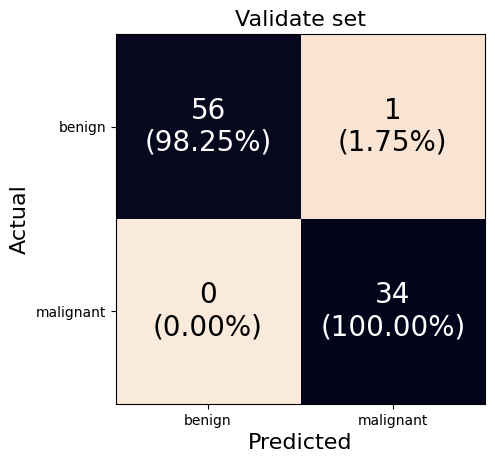

################# test set ##################
Best Threshold=1.000000
FPR: 0.0694
TPR: 0.8810
Confusion Matrix
----------------
[[67  5]
 [ 5 37]] 

----------------
split1
Sensitivity: 88.10%
Specificity: 93.06%
Accuracy: 91.23%
Precision: 88.10%
Sensitivity: 88.10%
Precision: 88.10%
F1: 88.10%


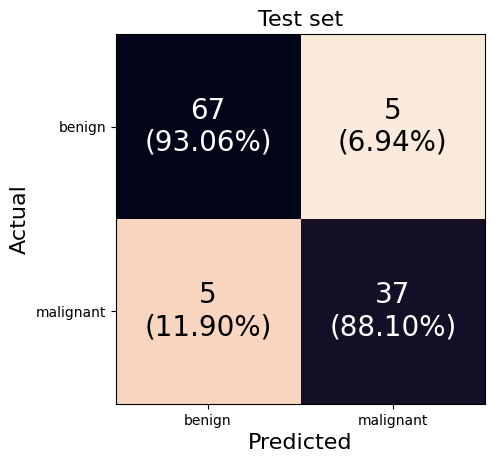

---------------------------------------
AUC validate: 99.12%
AUC test: 90.58%


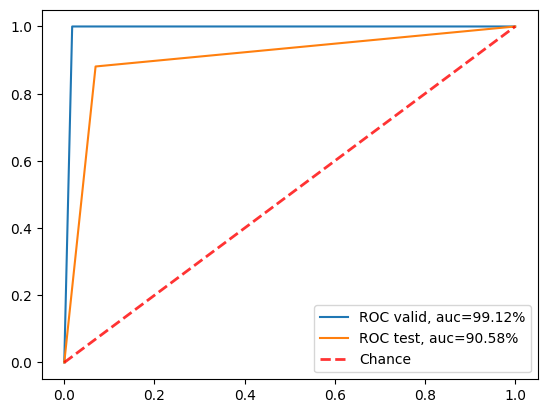

In [144]:
param = 1
param1_split1_cm_val, param1_split1_cm_test, param1_split1_AUC_val, param1_split1_AUC_test = evaluate(param,split)

## Param1 Split2

In [145]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [154]:
dtc_train_param1(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.666667
FPR: 0.0175
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
37  884437         B         19.86      337.7            0.107   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
37         0.04831         0.1737                  0.0644       2.612   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
37    23.22        0.01604       0.01865      0.03476               0.00356   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
37            0.1515           0.1181          0.2883                  0.07748  
[37]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split2
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


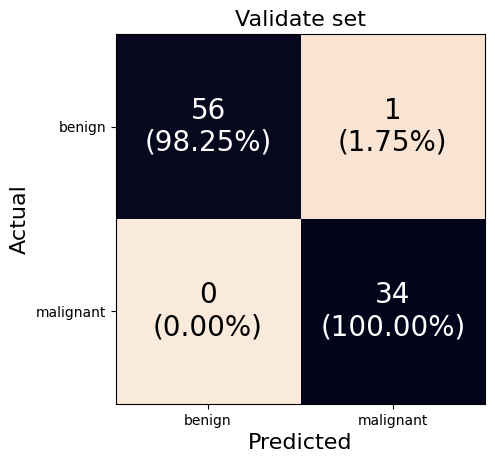

################# test set ##################
Best Threshold=1.000000
FPR: 0.0278
TPR: 0.9048
Confusion Matrix
----------------
[[70  2]
 [ 4 38]] 

----------------
split2
Sensitivity: 90.48%
Specificity: 97.22%
Accuracy: 94.74%
Precision: 95.00%
Sensitivity: 90.48%
Precision: 95.00%
F1: 92.68%


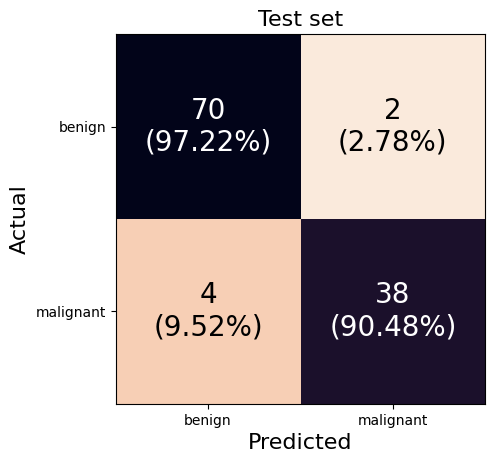

---------------------------------------
AUC validate: 99.97%
AUC test: 93.85%


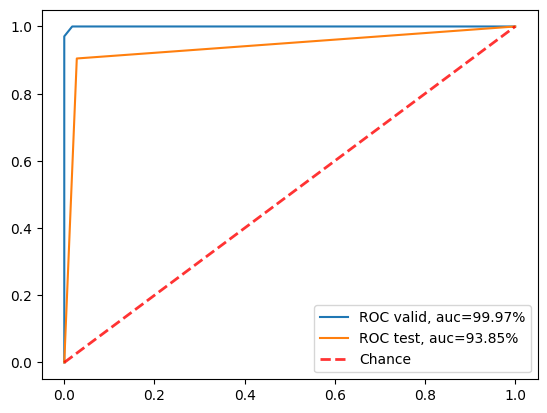

In [155]:
param = 1
param1_split2_cm_val, param1_split2_cm_test, param1_split2_AUC_val, param1_split2_AUC_test = evaluate(param,split)

## Param1 Split3

In [840]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [972]:
dtc_train_param1(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
0   904969         B         14.95      469.1          0.08682   
73  889403         M         19.38      758.6          0.07840   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0          0.02109         0.1571                 0.05708      0.9078   
73         0.04209         0.1547                 0.05443      0.9988   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
0     30.15       0.007702       0.01307      0.02970              0.001432   
73    22.18       0.002826       0.01311      0.01013              0.001345   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
0             0.1048          0.04921          0.2298                  0.05974  
73            0.1084          0.22600          0.2683                  0.06829  
[0, 73]

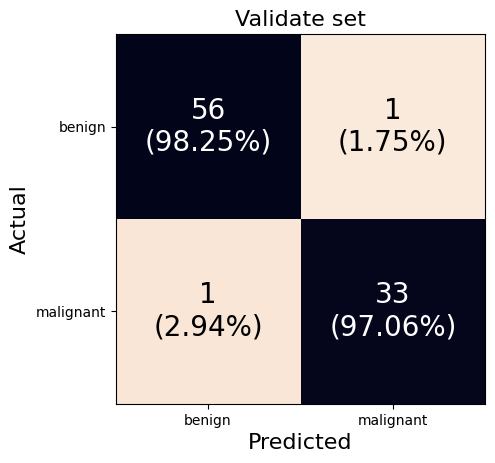

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8571
Confusion Matrix
----------------
[[69  3]
 [ 6 36]] 

----------------
split3
Sensitivity: 85.71%
Specificity: 95.83%
Accuracy: 92.11%
Precision: 92.31%
Sensitivity: 85.71%
Precision: 92.31%
F1: 88.89%


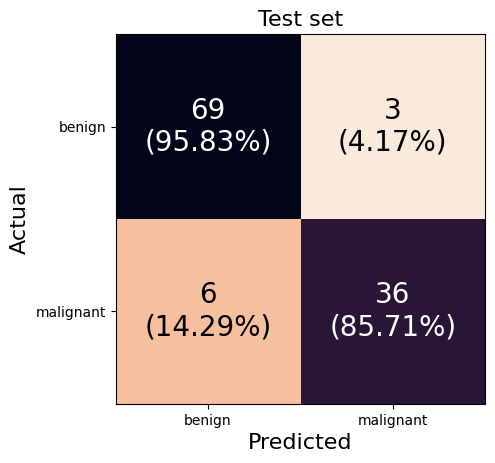

---------------------------------------
AUC validate: 97.65%
AUC test: 90.77%


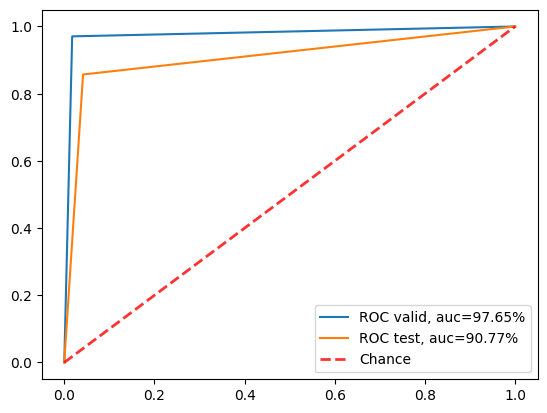

In [973]:
param = 1
param1_split3_cm_val, param1_split3_cm_test, param1_split3_AUC_val, param1_split3_AUC_test = evaluate(param,split)

## Param1 Split4

In [245]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [252]:
dtc_train_param1(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
19  909777         B         18.32      340.9          0.08142   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
19         0.01993         0.2372                 0.05768       2.542   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
19    13.12        0.01072       0.01993      0.01717              0.004492   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
19           0.09794          0.03986          0.2699                  0.06736  
[19]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split4
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


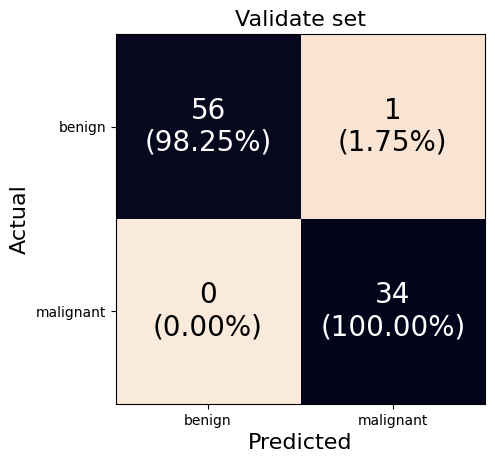

################# test set ##################
Best Threshold=1.000000
FPR: 0.0556
TPR: 0.8571
Confusion Matrix
----------------
[[68  4]
 [ 6 36]] 

----------------
split4
Sensitivity: 85.71%
Specificity: 94.44%
Accuracy: 91.23%
Precision: 90.00%
Sensitivity: 85.71%
Precision: 90.00%
F1: 87.80%


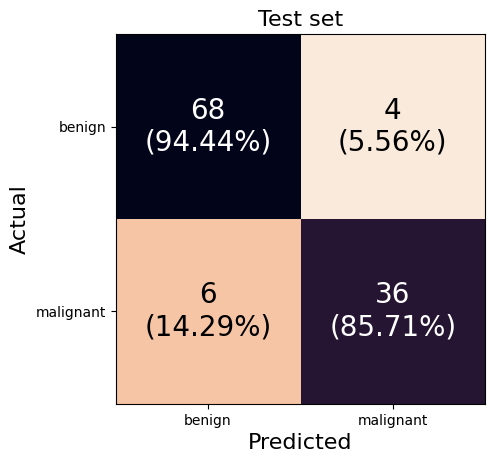

---------------------------------------
AUC validate: 99.12%
AUC test: 90.08%


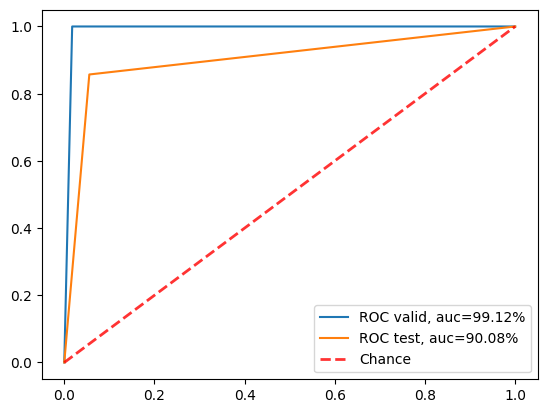

In [253]:
param1_split4_cm_val, param1_split4_cm_test, param1_split4_AUC_val, param1_split4_AUC_test = evaluate(param,split)

## Param1 Split5

In [254]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [329]:
dtc_train_param1(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.500000
FPR: 0.0175
TPR: 1.0000
      id diagnosis  texture_mean  area_mean  smoothness_mean  concavity_mean  \
5  91505         B         16.32      476.3           0.1158         0.05928   

   symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  \
5         0.1943                 0.06612       1.095    18.49       0.009702   

   concavity_se  symmetry_se  fractal_dimension_se  smoothness_worst  \
5       0.02575      0.02801               0.00248             0.158   

   concavity_worst  symmetry_worst  fractal_dimension_worst  
5           0.1889          0.3155                  0.07538  
[5]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split5
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


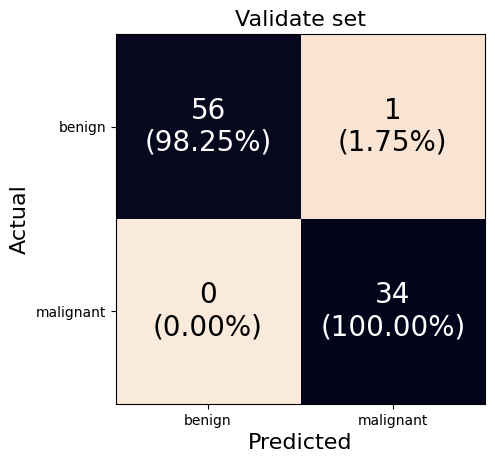

################# test set ##################
Best Threshold=0.500000
FPR: 0.0417
TPR: 0.8571
Confusion Matrix
----------------
[[69  3]
 [ 6 36]] 

----------------
split5
Sensitivity: 85.71%
Specificity: 95.83%
Accuracy: 92.11%
Precision: 92.31%
Sensitivity: 85.71%
Precision: 92.31%
F1: 88.89%


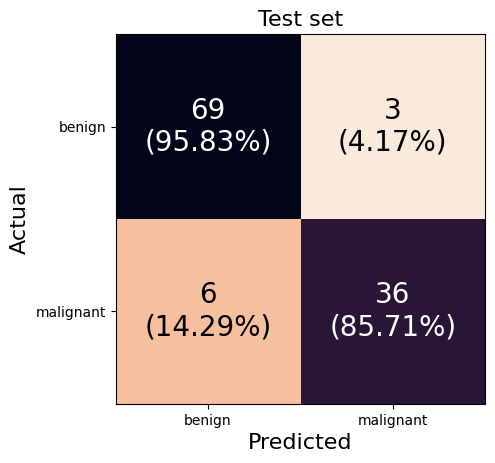

---------------------------------------
AUC validate: 99.05%
AUC test: 91.32%


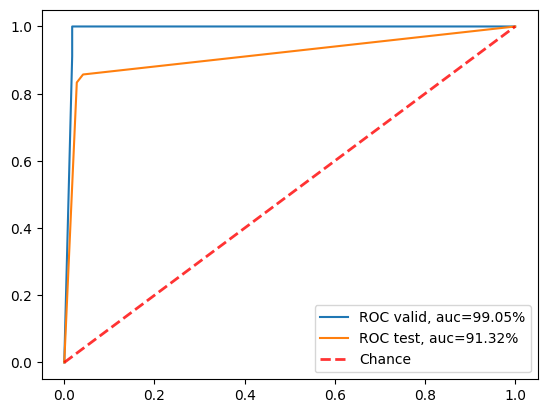

In [330]:
param1_split5_cm_val, param1_split5_cm_test, param1_split5_AUC_val, param1_split5_AUC_test = evaluate(param,split)

param1
split1
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split2
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split3
Sensitivity: 97.06%
Specificity: 98.25%
Accuracy: 97.80%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%

split4
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split5
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

overall
sensitivity: 99.41 ± 1.32%
specificity: 98.25 ± 0.00%
accuracy: 98.68 ± 0.49%
precision: 97.13 ± 0.04%
f1_score: 98.25 ± 0.67%


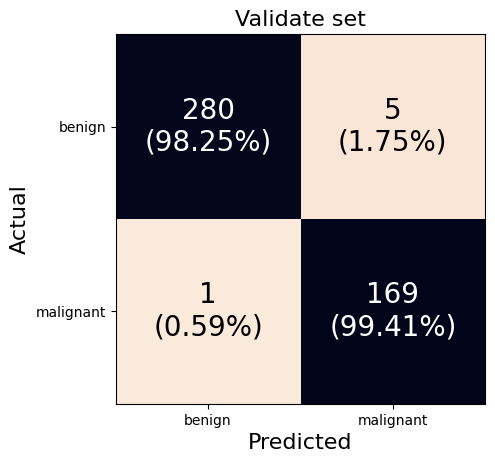

AUC1: 9898.35 ± 83.61%


In [974]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC1",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)

# ----------------------- PARAMETER 2 -----------------------

## Param2 Split1

In [332]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [333]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [340]:
dtc_train_param2(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
50  861103         B         20.97      401.5           0.1102   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
50         0.04591         0.1842                 0.07005       2.174   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
50    24.62        0.01037       0.02586      0.01816              0.003976   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
50            0.1557           0.1755          0.2762                  0.08851  
[50]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split1
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


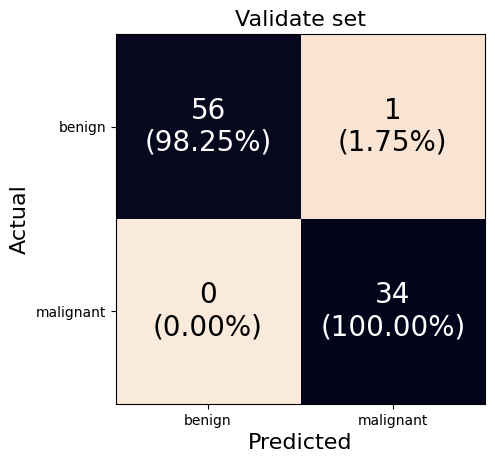

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8571
Confusion Matrix
----------------
[[69  3]
 [ 6 36]] 

----------------
split1
Sensitivity: 85.71%
Specificity: 95.83%
Accuracy: 92.11%
Precision: 92.31%
Sensitivity: 85.71%
Precision: 92.31%
F1: 88.89%


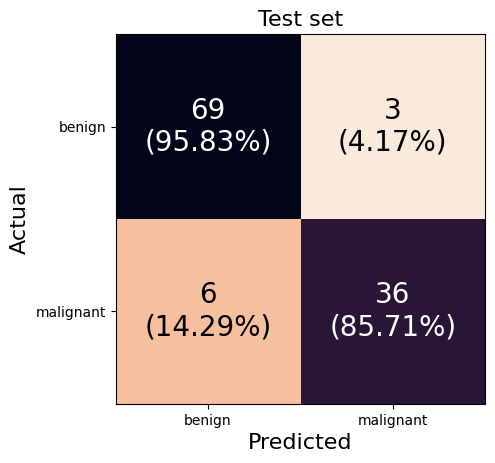

---------------------------------------
AUC validate: 99.12%
AUC test: 91.19%


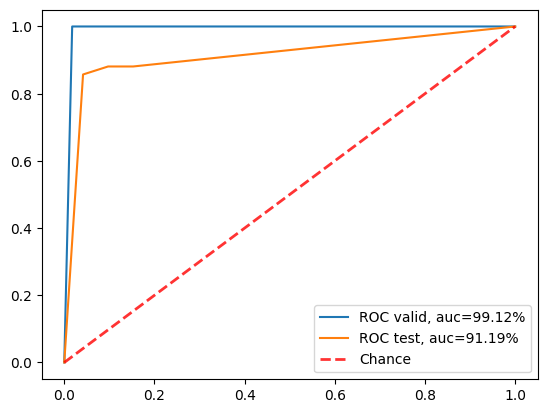

In [341]:
param = 2
param2_split1_cm_val, param2_split1_cm_test, param2_split1_AUC_val, param2_split1_AUC_test = evaluate(param,split)

## Param2 Split2

In [1027]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1053]:
dtc_train_param2(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.800000
FPR: 0.0351
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
44  911366         B         18.18      408.8          0.11750   
46   86408         B         20.76      480.4          0.09933   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
44          0.1020         0.1957                 0.07255       1.740   
46          0.1065         0.1735                 0.07070       1.803   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
44    27.85        0.01459       0.04961      0.01807              0.005217   
46    20.48        0.01291       0.05101      0.02144              0.005891   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
44            0.1780           0.3186          0.2660                  0.09270  
46            0.1287           0.2216          0.2226                  0.08486  
[44, 46

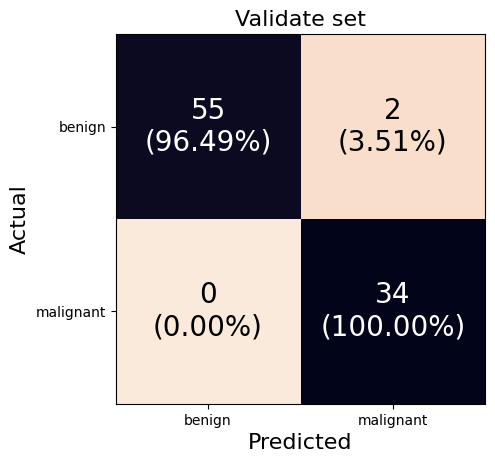

################# test set ##################
Best Threshold=0.991667
FPR: 0.0556
TPR: 0.8333
Confusion Matrix
----------------
[[68  4]
 [ 7 35]] 

----------------
split2
Sensitivity: 83.33%
Specificity: 94.44%
Accuracy: 90.35%
Precision: 89.74%
Sensitivity: 83.33%
Precision: 89.74%
F1: 86.42%


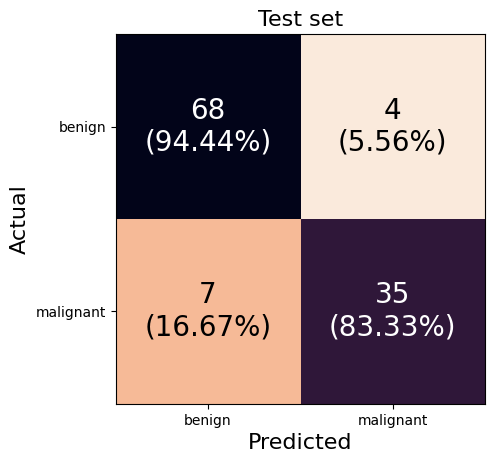

---------------------------------------
AUC validate: 98.79%
AUC test: 87.95%


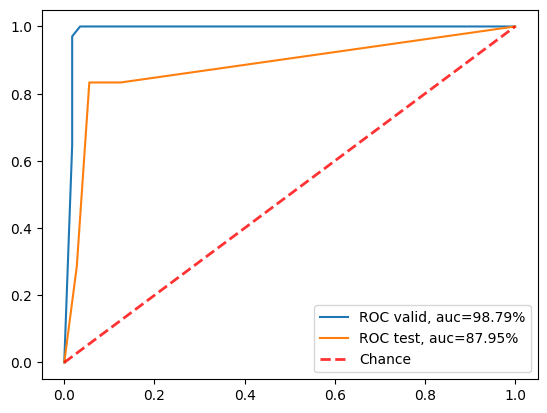

In [1054]:
param = 2
param2_split2_cm_val, param2_split2_cm_test, param2_split2_AUC_val, param2_split2_AUC_test = evaluate(param,split)

## Param2 Split3

In [1055]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1058]:
dtc_train_param2(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
22  874158         B         15.11      317.5          0.09267   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
22        0.001597         0.1703                 0.06048       1.268   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
22    26.43        0.01439      0.001597      0.02538               0.00347   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
22            0.1521          0.00692          0.2933                  0.07697  
[22]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split3
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


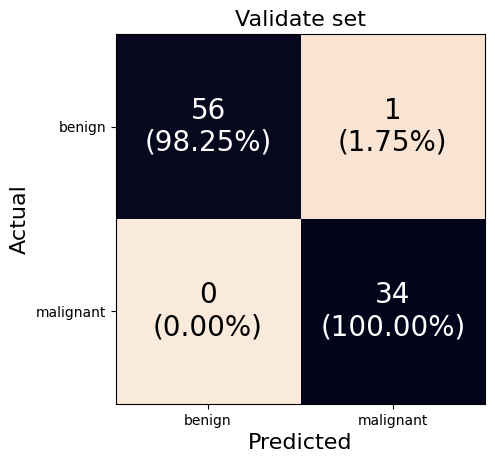

################# test set ##################
Best Threshold=1.000000
FPR: 0.0278
TPR: 0.8571
Confusion Matrix
----------------
[[70  2]
 [ 6 36]] 

----------------
split3
Sensitivity: 85.71%
Specificity: 97.22%
Accuracy: 92.98%
Precision: 94.74%
Sensitivity: 85.71%
Precision: 94.74%
F1: 90.00%


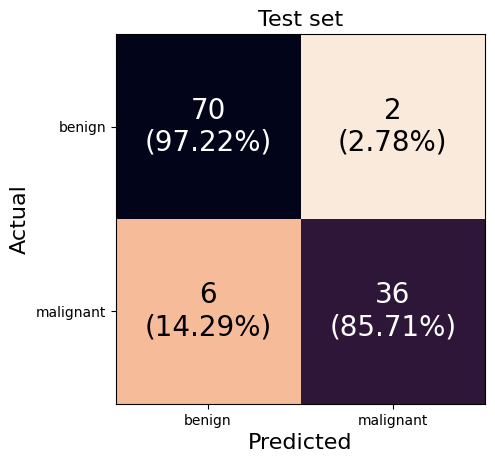

---------------------------------------
AUC validate: 99.12%
AUC test: 91.47%


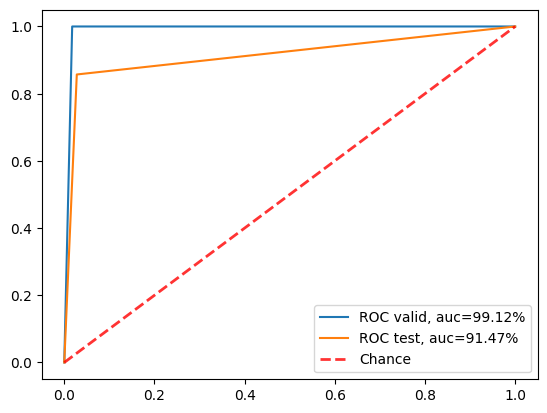

In [1059]:
param = 2
param2_split3_cm_val, param2_split3_cm_test, param2_split3_AUC_val, param2_split3_AUC_test = evaluate(param,split)

## Param2 Split4

In [490]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [493]:
dtc_train_param2(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.250000
FPR: 0.0175
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
16  877501         B         19.56      461.0          0.09586   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
16         0.04187         0.1979                 0.06013       1.326   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
16    27.24       0.007514       0.01401      0.01503              0.003338   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
16            0.1429           0.1377          0.2668                  0.08174  
[16]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split4
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


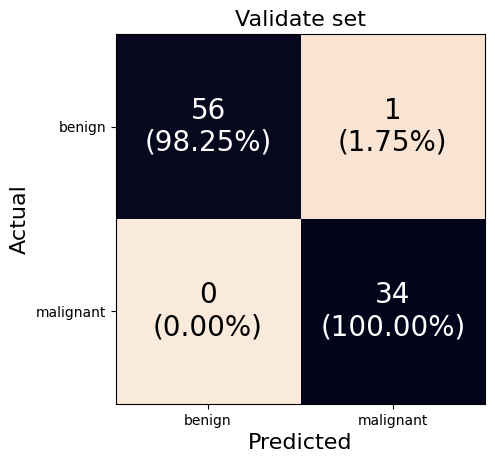

################# test set ##################
Best Threshold=0.250000
FPR: 0.0139
TPR: 0.8333
Confusion Matrix
----------------
[[71  1]
 [ 7 35]] 

----------------
split4
Sensitivity: 83.33%
Specificity: 98.61%
Accuracy: 92.98%
Precision: 97.22%
Sensitivity: 83.33%
Precision: 97.22%
F1: 89.74%


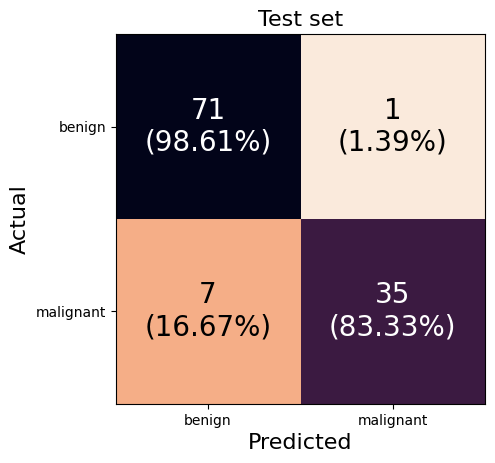

---------------------------------------
AUC validate: 99.10%
AUC test: 90.96%


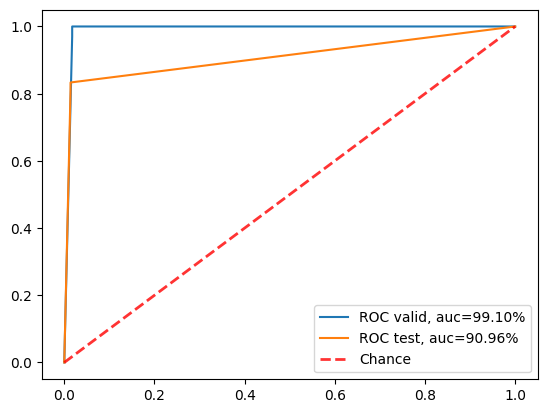

In [494]:
param2_split4_cm_val, param2_split4_cm_test, param2_split4_AUC_val, param2_split4_AUC_test = evaluate(param,split)

## Param2 Split5

In [387]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [488]:
dtc_train_param2(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
24  879804         B         17.27      295.4           0.1089   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
24         0.01756         0.1934                 0.06285       1.342   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
24    12.33       0.009719      0.007975       0.0221              0.002472   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
24            0.1415          0.06213          0.2989                   0.0738  
[24]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split5
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


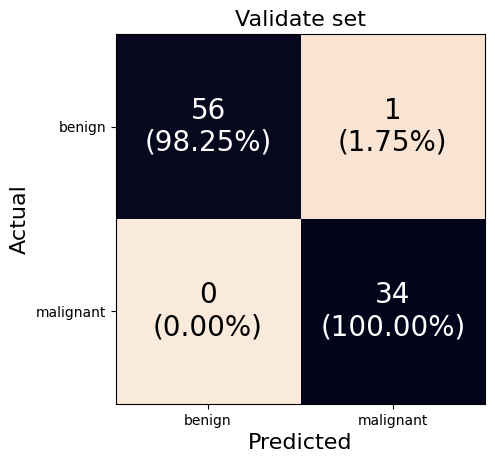

################# test set ##################
Best Threshold=0.333333
FPR: 0.0417
TPR: 0.9524
Confusion Matrix
----------------
[[69  3]
 [ 2 40]] 

----------------
split5
Sensitivity: 95.24%
Specificity: 95.83%
Accuracy: 95.61%
Precision: 93.02%
Sensitivity: 95.24%
Precision: 93.02%
F1: 94.12%


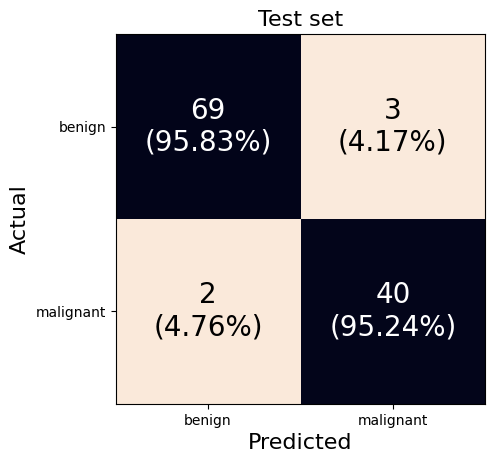

---------------------------------------
AUC validate: 99.12%
AUC test: 95.49%


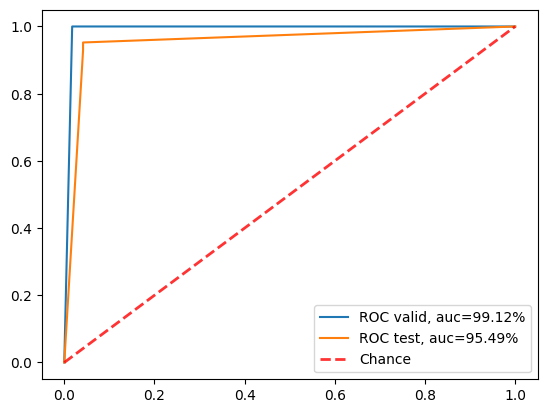

In [489]:
param2_split5_cm_val, param2_split5_cm_test, param2_split5_AUC_val, param2_split5_AUC_test = evaluate(param,split)

# ----------------------- PARAMETER 3 -----------------------

## Param3 Split1

In [1060]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1061]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [1066]:
dtc_train_param3(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
20   874373         B         17.19      420.3          0.09774   
83  8911163         M         24.48      998.9          0.08855   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
20         0.03809         0.1516                 0.06095      0.7655   
83         0.05699         0.1538                 0.05510      1.4330   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
20    17.86       0.006905       0.01978      0.01897              0.001671   
83    45.81       0.005444       0.01622      0.01419              0.002751   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
20            0.1323           0.1521          0.2572                  0.07097  
83            0.1315           0.2080          0.2504                  0.07948  
[20,

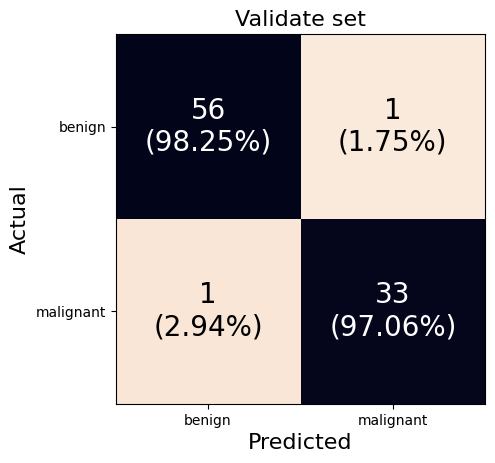

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8571
Confusion Matrix
----------------
[[69  3]
 [ 6 36]] 

----------------
split1
Sensitivity: 85.71%
Specificity: 95.83%
Accuracy: 92.11%
Precision: 92.31%
Sensitivity: 85.71%
Precision: 92.31%
F1: 88.89%


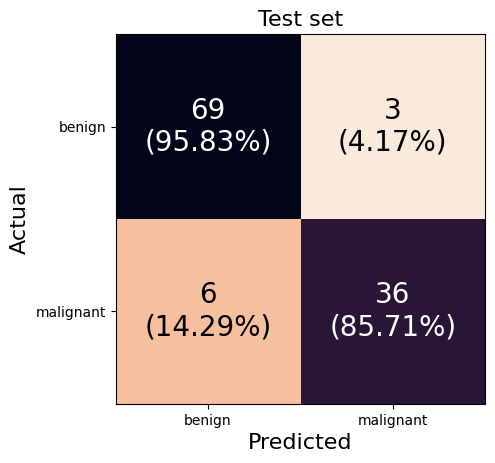

---------------------------------------
AUC validate: 97.63%
AUC test: 90.48%


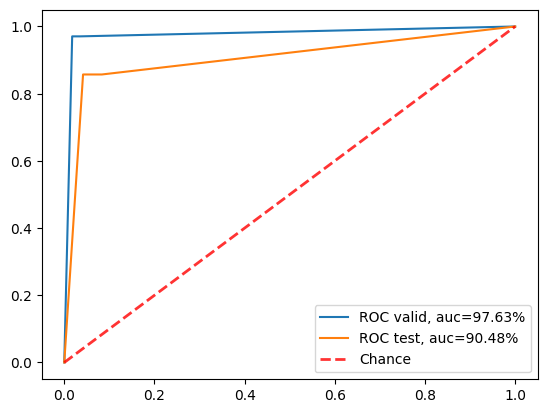

In [1067]:
param = 3
param3_split1_cm_val, param3_split1_cm_test, param3_split1_AUC_val, param3_split1_AUC_test = evaluate(param,split)

## Param3 Split2

In [1068]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1131]:
dtc_train_param3(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0000
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
88  8812877         M         20.25      761.3           0.1025   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
88          0.1147         0.1935                 0.06303      0.9209   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
88    32.19       0.004766       0.02384      0.01772              0.003131   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
88            0.1552           0.3976          0.3993                   0.1064  
[88]
Confusion Matrix
----------------
[[57  0]
 [ 1 33]] 

----------------
split2
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


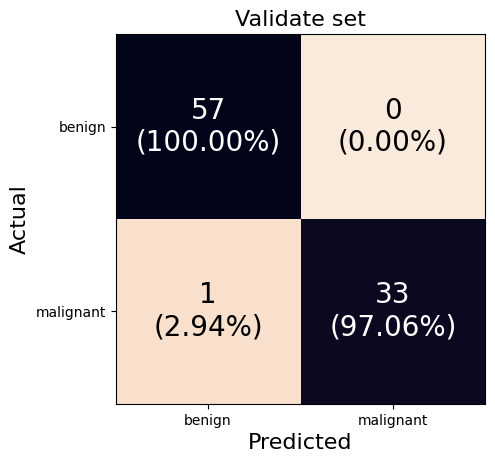

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8095
Confusion Matrix
----------------
[[69  3]
 [ 8 34]] 

----------------
split2
Sensitivity: 80.95%
Specificity: 95.83%
Accuracy: 90.35%
Precision: 91.89%
Sensitivity: 80.95%
Precision: 91.89%
F1: 86.08%


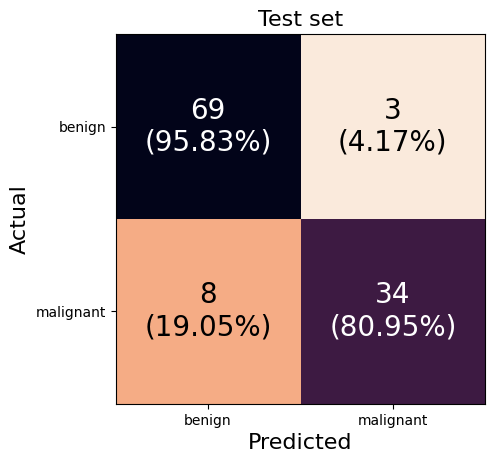

---------------------------------------
AUC validate: 98.53%
AUC test: 88.39%


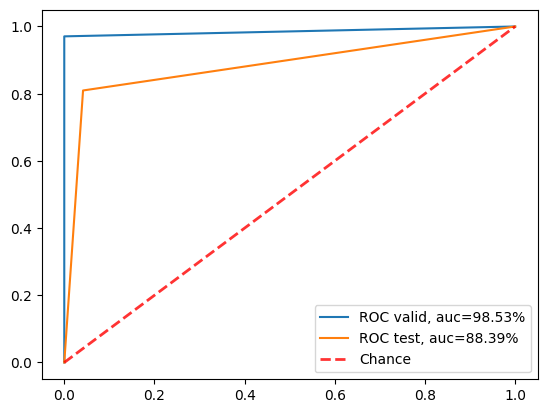

In [1132]:
param = 3
param3_split2_cm_val, param3_split2_cm_test, param3_split2_AUC_val, param3_split2_AUC_test = evaluate(param,split)

## Param3 Split3

In [1133]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1178]:
dtc_train_param3(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.333333
FPR: 0.0175
TPR: 1.0000
       id diagnosis  texture_mean  area_mean  smoothness_mean  concavity_mean  \
29  87127         B          9.71      357.6          0.09594         0.02531   

    symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  \
29         0.1381                   0.064      0.4064    11.48       0.007809   

    concavity_se  symmetry_se  fractal_dimension_se  smoothness_worst  \
29       0.01099      0.01254               0.00212            0.1436   

    concavity_worst  symmetry_worst  fractal_dimension_worst  
29           0.1047           0.209                  0.07699  
[29]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split3
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


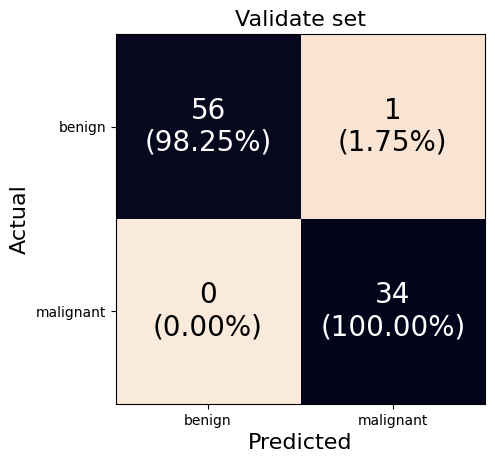

################# test set ##################
Best Threshold=1.000000
FPR: 0.0556
TPR: 0.8571
Confusion Matrix
----------------
[[68  4]
 [ 6 36]] 

----------------
split3
Sensitivity: 85.71%
Specificity: 94.44%
Accuracy: 91.23%
Precision: 90.00%
Sensitivity: 85.71%
Precision: 90.00%
F1: 87.80%


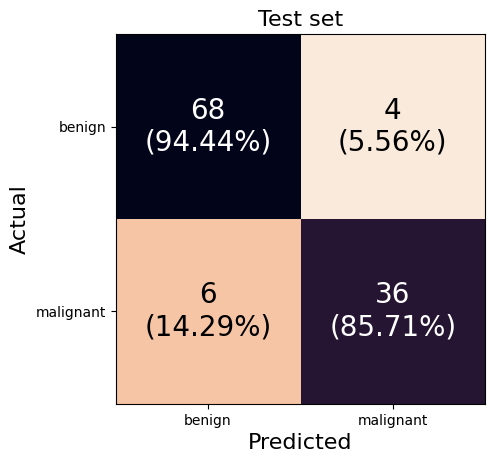

---------------------------------------
AUC validate: 99.10%
AUC test: 90.08%


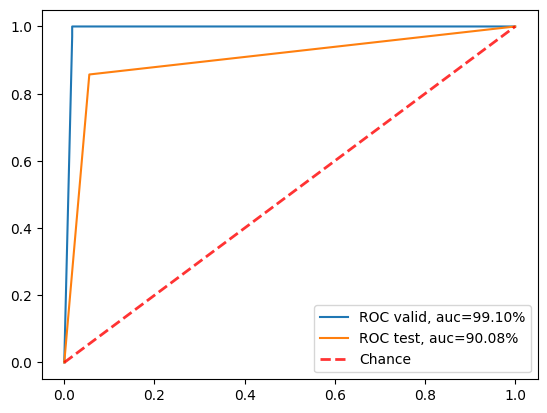

In [1179]:
param = 3
param3_split3_cm_val, param3_split3_cm_test, param3_split3_AUC_val, param3_split3_AUC_test = evaluate(param,split)

## Param3 Split4

In [1180]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1181]:
dtc_train_param3(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
3   8910721         B         16.82      632.6          0.06429   
89   873593         M         26.57     1311.0          0.11410   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
3          0.00725         0.1508                 0.05376      0.7198   
89         0.24870         0.2395                 0.07398      0.7629   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
3     10.77       0.003492      0.004826      0.01536              0.001381   
89    81.46       0.004253      0.038720      0.01798              0.005295   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
3            0.08567          0.03866          0.2458                   0.0612  
89           0.14910          0.67800          0.4098                   0.1284  
[3, 

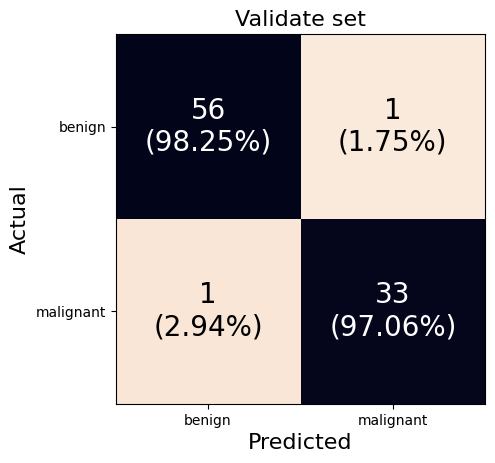

################# test set ##################
Best Threshold=1.000000
FPR: 0.0139
TPR: 0.8333
Confusion Matrix
----------------
[[71  1]
 [ 7 35]] 

----------------
split4
Sensitivity: 83.33%
Specificity: 98.61%
Accuracy: 92.98%
Precision: 97.22%
Sensitivity: 83.33%
Precision: 97.22%
F1: 89.74%


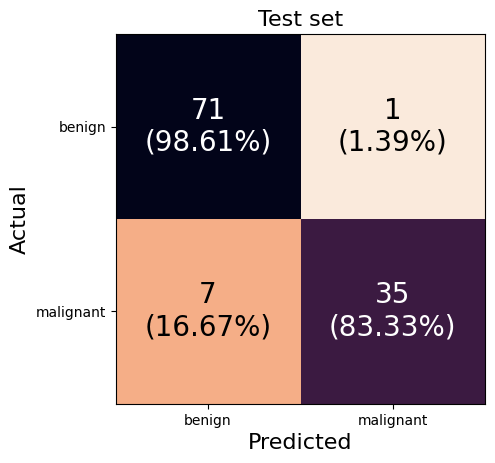

---------------------------------------
AUC validate: 97.65%
AUC test: 90.97%


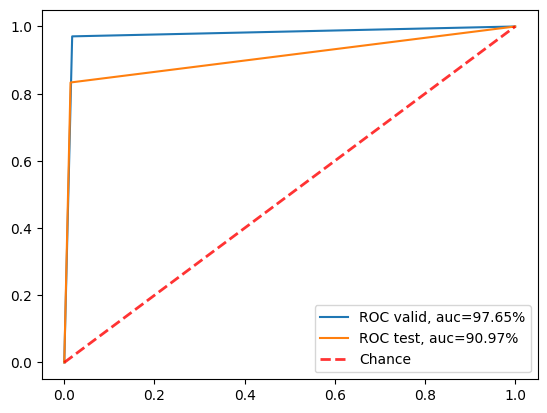

In [1182]:
param3_split4_cm_val, param3_split4_cm_test, param3_split4_AUC_val, param3_split4_AUC_test = evaluate(param,split)

## Param3 Split5

In [1183]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1194]:
dtc_train_param3(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
4  89143602         B         19.73      651.0          0.08757   

   concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
4          0.1362         0.1714                 0.07192        1.77    77.11   

   smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
4       0.007762        0.0996      0.04077               0.02286   

   smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
4           0.09983            0.222          0.2272                  0.08799  
[4]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split5
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


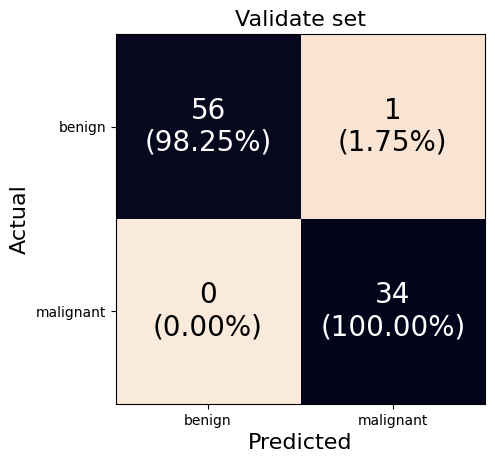

################# test set ##################
Best Threshold=1.000000
FPR: 0.0694
TPR: 0.9048
Confusion Matrix
----------------
[[67  5]
 [ 4 38]] 

----------------
split5
Sensitivity: 90.48%
Specificity: 93.06%
Accuracy: 92.11%
Precision: 88.37%
Sensitivity: 90.48%
Precision: 88.37%
F1: 89.41%


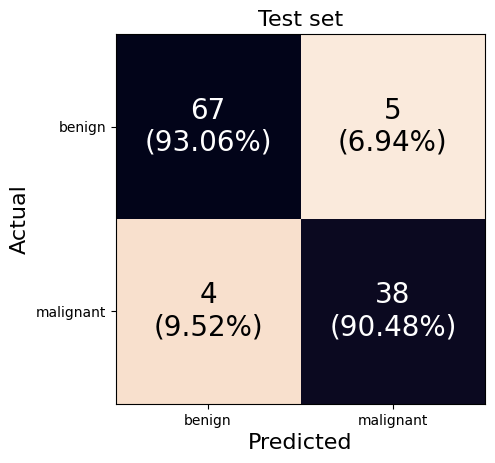

---------------------------------------
AUC validate: 99.12%
AUC test: 91.57%


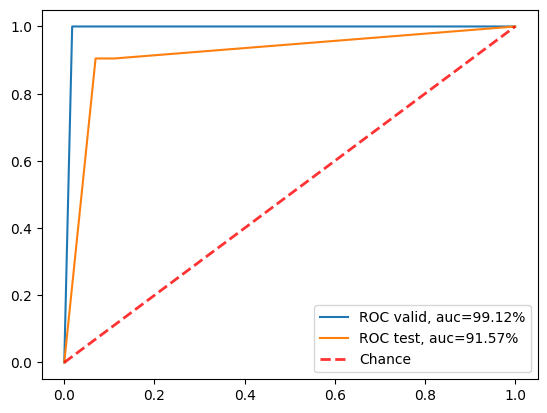

In [1195]:
param3_split5_cm_val, param3_split5_cm_test, param3_split5_AUC_val, param3_split5_AUC_test = evaluate(param,split)

# ----------------------- PARAMETER 4 -----------------------

## Param4 Split1

In [1196]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1197]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [1200]:
dtc_train_param4(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
3   8910721         B         16.82      632.6          0.06429   
20   874373         B         17.19      420.3          0.09774   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
3          0.00725         0.1508                 0.05376      0.7198   
20         0.03809         0.1516                 0.06095      0.7655   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
3     10.77       0.003492      0.004826      0.01536              0.001381   
20    17.86       0.006905      0.019780      0.01897              0.001671   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
3            0.08567          0.03866          0.2458                  0.06120  
20           0.13230          0.15210          0.2572                  0.07097  
[3, 

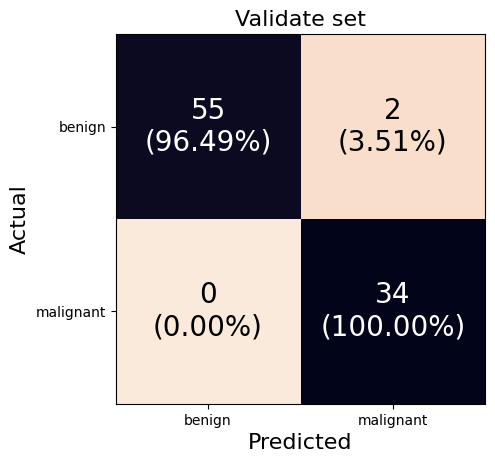

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8571
Confusion Matrix
----------------
[[69  3]
 [ 6 36]] 

----------------
split1
Sensitivity: 85.71%
Specificity: 95.83%
Accuracy: 92.11%
Precision: 92.31%
Sensitivity: 85.71%
Precision: 92.31%
F1: 88.89%


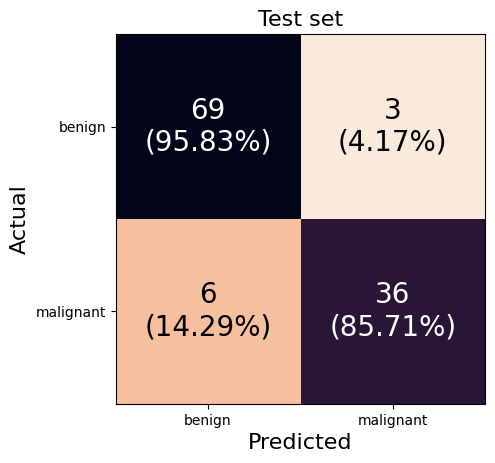

---------------------------------------
AUC validate: 98.25%
AUC test: 90.77%


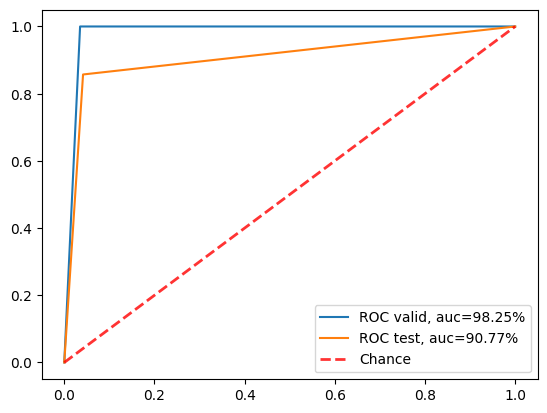

In [1201]:
param = 4
param4_split1_cm_val, param4_split1_cm_test, param4_split1_AUC_val, param4_split1_AUC_test = evaluate(param,split)

## Param4 Split2

In [1259]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1277]:
dtc_train_param4(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 1.0000
       id diagnosis  texture_mean  area_mean  smoothness_mean  concavity_mean  \
39  89524         B         12.88      616.5          0.09309         0.01765   

    symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  \
39         0.1373                   0.057       1.081    23.92       0.006692   

    concavity_se  symmetry_se  fractal_dimension_se  smoothness_worst  \
39      0.005717      0.01416              0.002476            0.1281   

    concavity_worst  symmetry_worst  fractal_dimension_worst  
39          0.05307            0.21                  0.07083  
[39]
Confusion Matrix
----------------
[[56  1]
 [ 0 34]] 

----------------
split2
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%


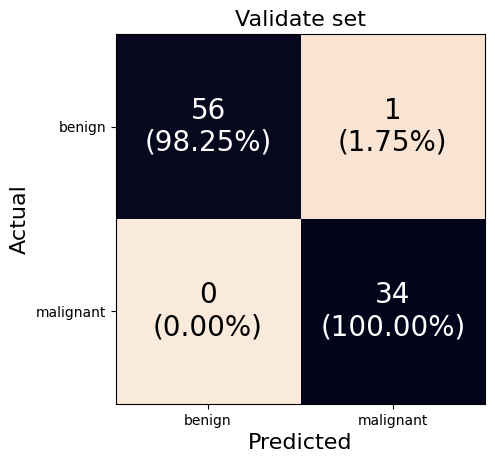

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.8333
Confusion Matrix
----------------
[[66  6]
 [ 7 35]] 

----------------
split2
Sensitivity: 83.33%
Specificity: 91.67%
Accuracy: 88.60%
Precision: 85.37%
Sensitivity: 83.33%
Precision: 85.37%
F1: 84.34%


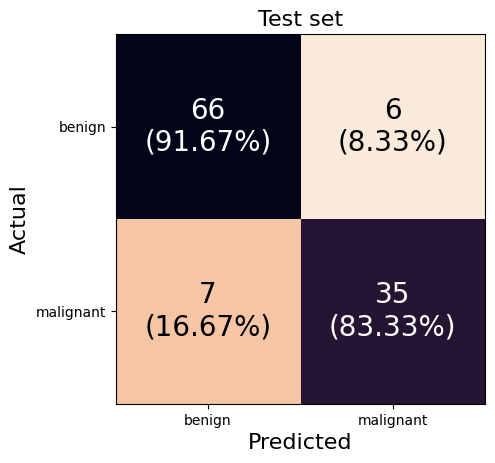

---------------------------------------
AUC validate: 99.12%
AUC test: 87.50%


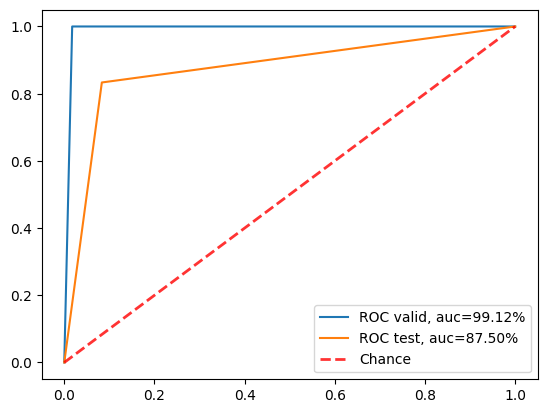

In [1278]:
param = 4
param4_split2_cm_val, param4_split2_cm_test, param4_split2_AUC_val, param4_split2_AUC_test = evaluate(param,split)

## Param4 Split3

In [1279]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1302]:
dtc_train_param4(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
22  874158         B         15.11      317.5          0.09267   
29   87127         B          9.71      357.6          0.09594   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
22        0.001597         0.1703                 0.06048      1.2680   
29        0.025310         0.1381                 0.06400      0.4064   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
22    26.43       0.014390      0.001597      0.02538               0.00347   
29    11.48       0.007809      0.010990      0.01254               0.00212   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
22            0.1521          0.00692          0.2933                  0.07697  
29            0.1436          0.10470          0.2090                  0.07699  
[22, 29

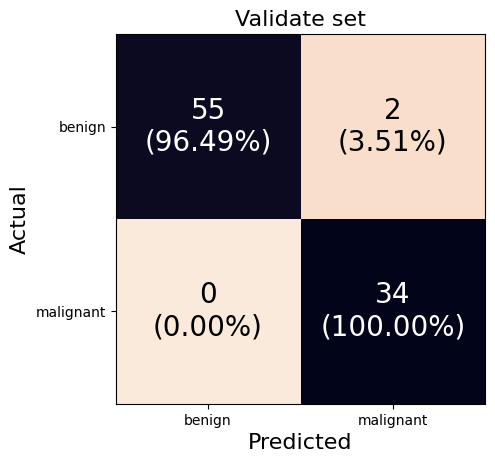

################# test set ##################
Best Threshold=1.000000
FPR: 0.0694
TPR: 0.9048
Confusion Matrix
----------------
[[67  5]
 [ 4 38]] 

----------------
split3
Sensitivity: 90.48%
Specificity: 93.06%
Accuracy: 92.11%
Precision: 88.37%
Sensitivity: 90.48%
Precision: 88.37%
F1: 89.41%


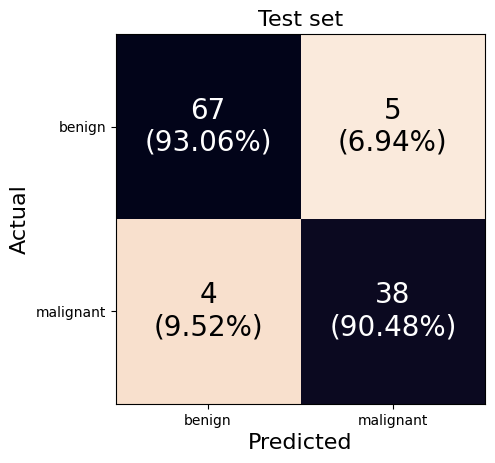

---------------------------------------
AUC validate: 98.25%
AUC test: 91.77%


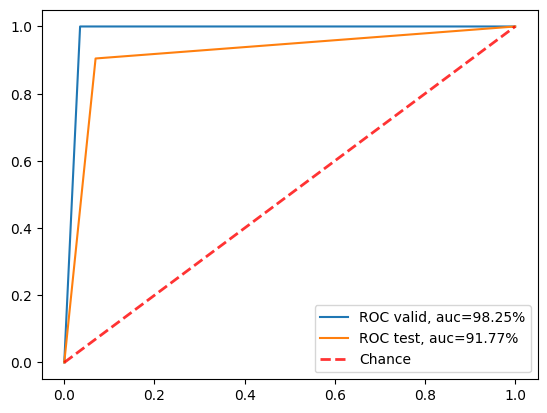

In [1303]:
param = 4
param4_split3_cm_val, param4_split3_cm_test, param4_split3_AUC_val, param4_split3_AUC_test = evaluate(param,split)

## Param 4 Split4

In [1304]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1305]:
dtc_train_param4(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
3   8910721         B         16.82      632.6          0.06429   
16   877501         B         19.56      461.0          0.09586   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
3          0.00725         0.1508                 0.05376      0.7198   
16         0.04187         0.1979                 0.06013      1.3260   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
3     10.77       0.003492      0.004826      0.01536              0.001381   
16    27.24       0.007514      0.014010      0.01503              0.003338   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
3            0.08567          0.03866          0.2458                  0.06120  
16           0.14290          0.13770          0.2668                  0.08174  
[3, 

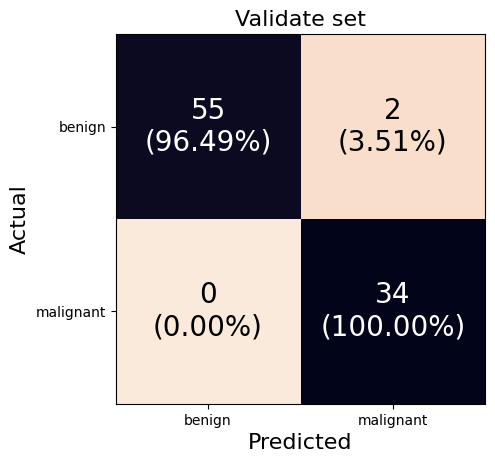

################# test set ##################
Best Threshold=1.000000
FPR: 0.0556
TPR: 0.8810
Confusion Matrix
----------------
[[68  4]
 [ 5 37]] 

----------------
split4
Sensitivity: 88.10%
Specificity: 94.44%
Accuracy: 92.11%
Precision: 90.24%
Sensitivity: 88.10%
Precision: 90.24%
F1: 89.16%


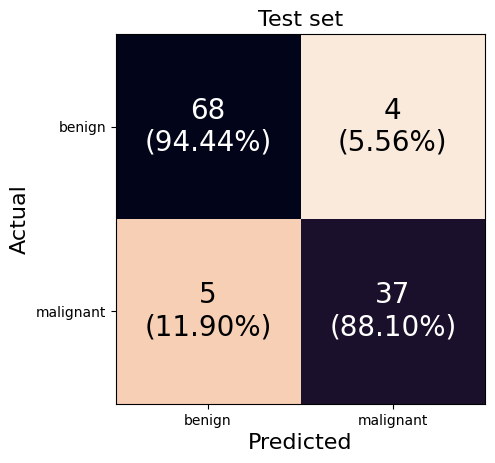

---------------------------------------
AUC validate: 98.25%
AUC test: 91.27%


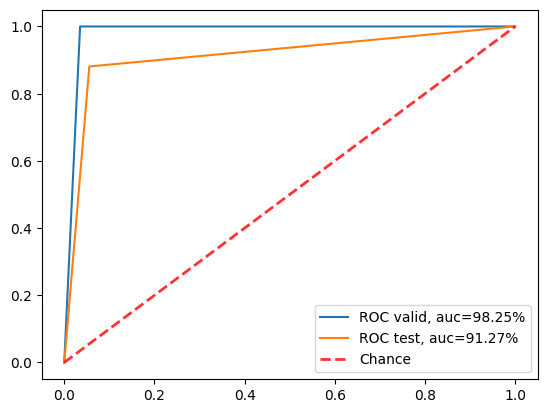

In [1306]:
param4_split4_cm_val, param4_split4_cm_test, param4_split4_AUC_val, param4_split4_AUC_test = evaluate(param,split)

## Param4 Split5

In [1307]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1382]:
dtc_train_param4(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
5     91505         B         16.32      476.3          0.11580   
16   877501         B         19.56      461.0          0.09586   
21   904357         B         17.26      431.9          0.09087   
83  8911163         M         24.48      998.9          0.08855   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
5          0.05928         0.1943                 0.06612       1.095   
16         0.04187         0.1979                 0.06013       1.326   
21         0.02853         0.1847                 0.06019       1.140   
83         0.05699         0.1538                 0.05510       1.433   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
5     18.49       0.009702       0.02575      0.02801              0.002480   
16    27.24       0.007514       0.01401      0

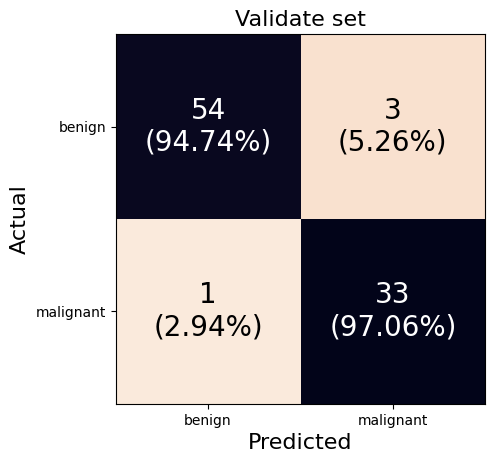

################# test set ##################
Best Threshold=1.000000
FPR: 0.0278
TPR: 0.8810
Confusion Matrix
----------------
[[70  2]
 [ 5 37]] 

----------------
split5
Sensitivity: 88.10%
Specificity: 97.22%
Accuracy: 93.86%
Precision: 94.87%
Sensitivity: 88.10%
Precision: 94.87%
F1: 91.36%


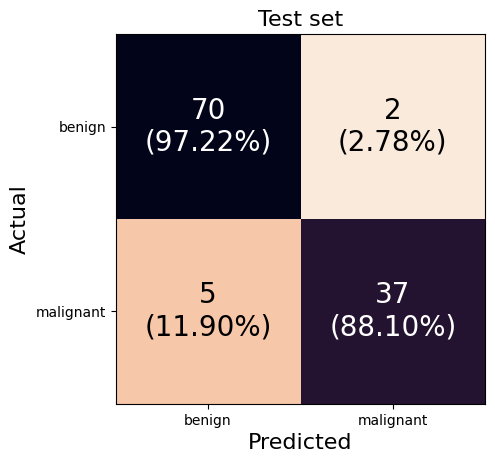

---------------------------------------
AUC validate: 95.90%
AUC test: 92.66%


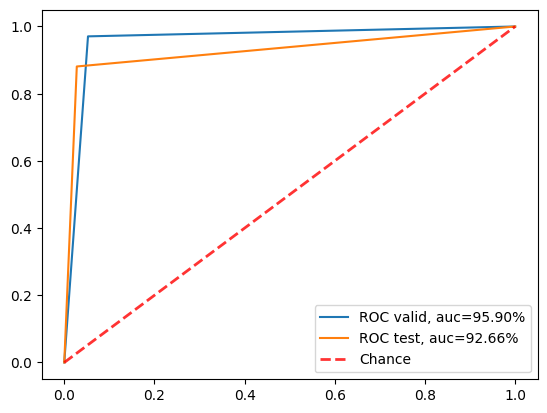

In [1383]:
param4_split5_cm_val, param4_split5_cm_test, param4_split5_AUC_val, param4_split5_AUC_test = evaluate(param,split)

# ----------------------- PARAMETER 5 -----------------------

## Param5 Split1

In [1384]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1385]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [1386]:
dtc_train_param5(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
41   891923         B         13.27      582.7          0.09198   
42  9110944         B         17.66      674.8          0.09179   
83  8911163         M         24.48      998.9          0.08855   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
41         0.01063         0.1592                 0.05912      0.6946   
42         0.04069         0.1893                 0.05886      0.6221   
83         0.05699         0.1538                 0.05510      1.4330   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
41    17.74       0.004348      0.004272      0.02154              0.001802   
42    19.75       0.004796      0.017580      0.02254              0.001971   
83    45.81       0.005444      0.016220      0.01419              0.002751   

    smoothness_worst  concav

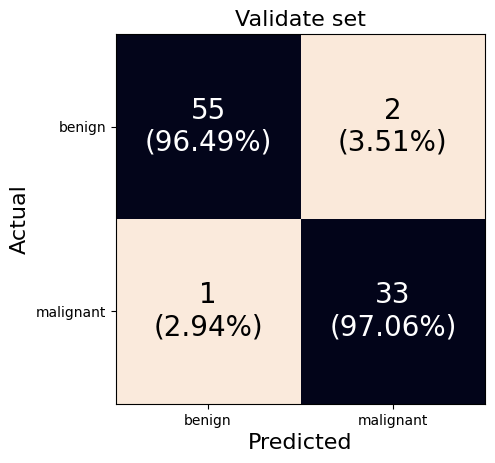

################# test set ##################
Best Threshold=1.000000
FPR: 0.0556
TPR: 0.9048
Confusion Matrix
----------------
[[68  4]
 [ 4 38]] 

----------------
split1
Sensitivity: 90.48%
Specificity: 94.44%
Accuracy: 92.98%
Precision: 90.48%
Sensitivity: 90.48%
Precision: 90.48%
F1: 90.48%


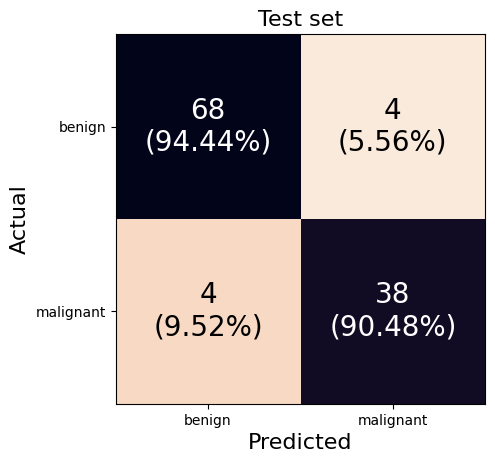

---------------------------------------
AUC validate: 96.78%
AUC test: 92.46%


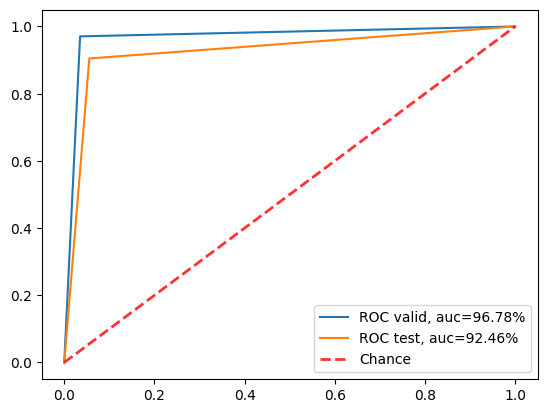

In [1387]:
param = 5
param5_split1_cm_val, param5_split1_cm_test, param5_split1_AUC_val, param5_split1_AUC_test = evaluate(param,split)

## Param5 Split2

In [1388]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1397]:
dtc_train_param5(split)

../kitt/DATA_progress3//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
0   904969         B         14.95      469.1          0.08682   
72  874858         M         23.12      609.9          0.10750   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0          0.02109         0.1571                 0.05708      0.9078   
72         0.19810         0.2384                 0.07542      2.1100   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
0     30.15       0.007702       0.01307      0.02970              0.001432   
72    31.72       0.007970       0.11660      0.05113              0.011720   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
0             0.1048          0.04921          0.2298                  0.05974  
72            0.1533          0.84880          0.5166                  0.14460  
[0, 72]

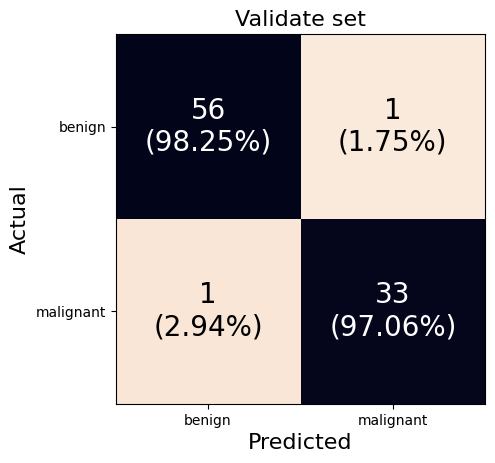

################# test set ##################
Best Threshold=1.000000
FPR: 0.0139
TPR: 0.8810
Confusion Matrix
----------------
[[71  1]
 [ 5 37]] 

----------------
split2
Sensitivity: 88.10%
Specificity: 98.61%
Accuracy: 94.74%
Precision: 97.37%
Sensitivity: 88.10%
Precision: 97.37%
F1: 92.50%


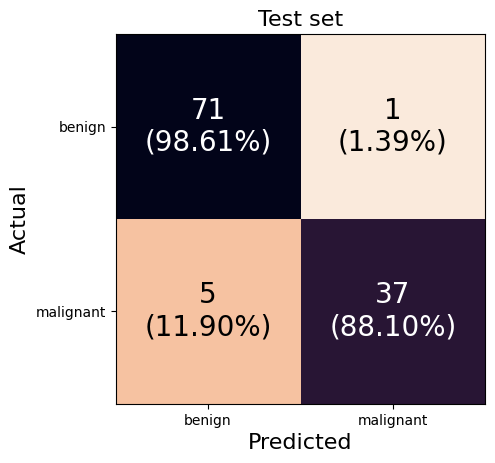

---------------------------------------
AUC validate: 97.65%
AUC test: 93.35%


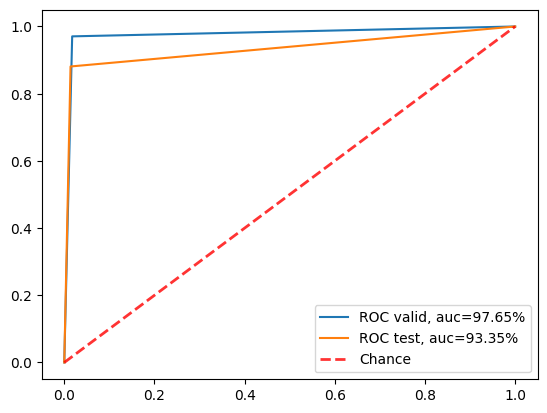

In [1398]:
param = 5
param5_split2_cm_val, param5_split2_cm_test, param5_split2_AUC_val, param5_split2_AUC_test = evaluate(param,split)

## Param5 Split3

In [1399]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1400]:
dtc_train_param5(split)

../kitt/DATA_progress3//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
29   87127         B          9.71      357.6          0.09594   
73  889403         M         19.38      758.6          0.07840   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
29         0.02531         0.1381                 0.06400      0.4064   
73         0.04209         0.1547                 0.05443      0.9988   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
29    11.48       0.007809       0.01099      0.01254              0.002120   
73    22.18       0.002826       0.01311      0.01013              0.001345   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
29            0.1436           0.1047          0.2090                  0.07699  
73            0.1084           0.2260          0.2683                  0.06829  
[29, 73

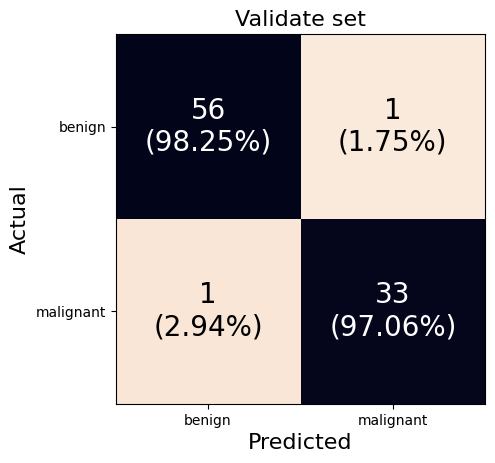

################# test set ##################
Best Threshold=1.000000
FPR: 0.0278
TPR: 0.8333
Confusion Matrix
----------------
[[70  2]
 [ 7 35]] 

----------------
split3
Sensitivity: 83.33%
Specificity: 97.22%
Accuracy: 92.11%
Precision: 94.59%
Sensitivity: 83.33%
Precision: 94.59%
F1: 88.61%


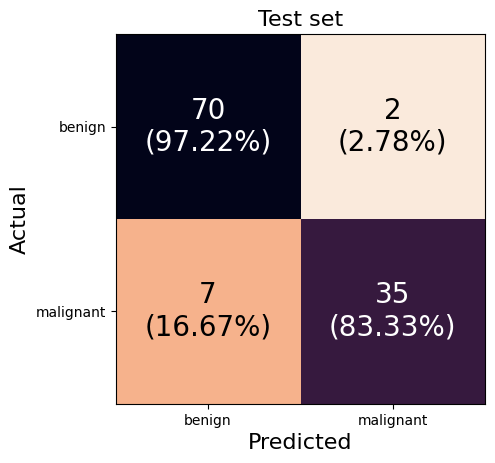

---------------------------------------
AUC validate: 97.65%
AUC test: 90.28%


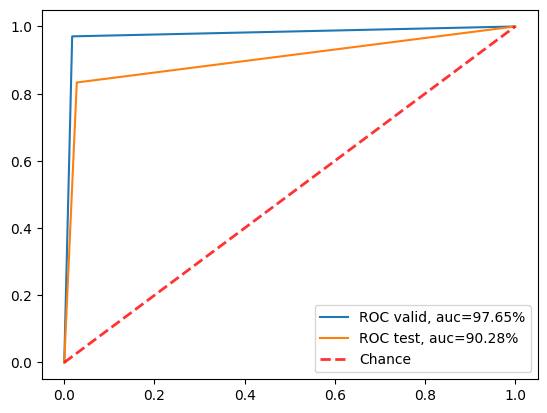

In [1401]:
param = 5
param5_split3_cm_val, param5_split3_cm_test, param5_split3_AUC_val, param5_split3_AUC_test = evaluate(param,split)

## Param5 Split4

In [1402]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1403]:
dtc_train_param5(split)

../kitt/DATA_progress3//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
3   8910721         B         16.82      632.6          0.06429   
37   884437         B         19.86      337.7          0.10700   
89   873593         M         26.57     1311.0          0.11410   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
3          0.00725         0.1508                 0.05376      0.7198   
37         0.04831         0.1737                 0.06440      2.6120   
89         0.24870         0.2395                 0.07398      0.7629   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
3     10.77       0.003492      0.004826      0.01536              0.001381   
37    23.22       0.016040      0.018650      0.03476              0.003560   
89    81.46       0.004253      0.038720      0.01798              0.005295   

    smoothness_worst  concav

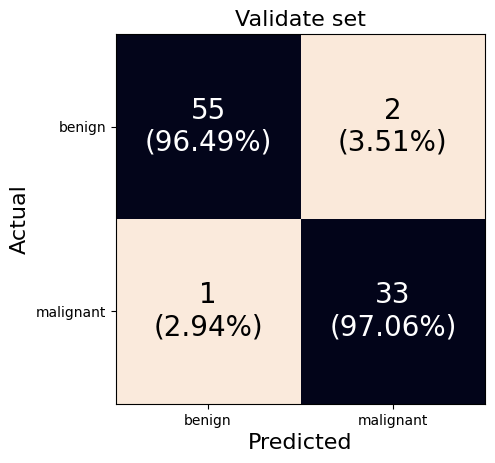

################# test set ##################
Best Threshold=1.000000
FPR: 0.0694
TPR: 0.8571
Confusion Matrix
----------------
[[67  5]
 [ 6 36]] 

----------------
split4
Sensitivity: 85.71%
Specificity: 93.06%
Accuracy: 90.35%
Precision: 87.80%
Sensitivity: 85.71%
Precision: 87.80%
F1: 86.75%


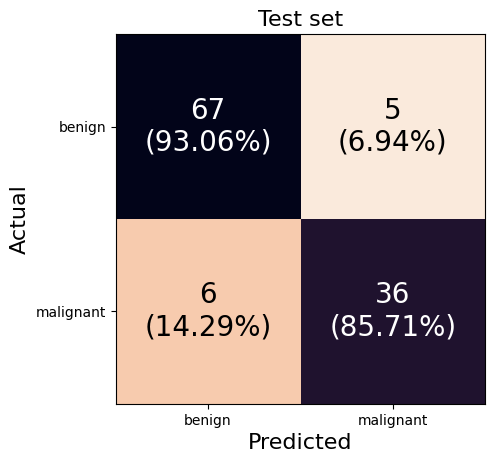

---------------------------------------
AUC validate: 96.78%
AUC test: 89.38%


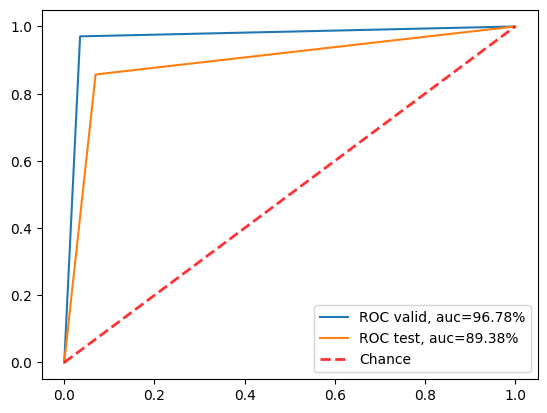

In [1404]:
param5_split4_cm_val, param5_split4_cm_test, param5_split4_AUC_val, param5_split4_AUC_test = evaluate(param,split)

## Param5 Split5

In [1405]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1406]:
dtc_train_param5(split)

../kitt/DATA_progress3//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.9118
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
24    879804         B         17.27      295.4          0.10890   
35   8911230         B         14.16      396.6          0.09379   
49  91544001         B         20.04      453.1          0.10960   
54    906539         B         19.04      409.7          0.08546   
59    891703         B         17.46      432.7          0.08372   
73    889403         M         19.38      758.6          0.07840   
83   8911163         M         24.48      998.9          0.08855   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
24        0.017560         0.1934                 0.06285      1.3420   
35        0.001487         0.1954                 0.05821      1.2800   
49        0.081750         0.2124                 0.06894      0.7959   
54        0.054850         0.2031                 0.06267      1.4400 

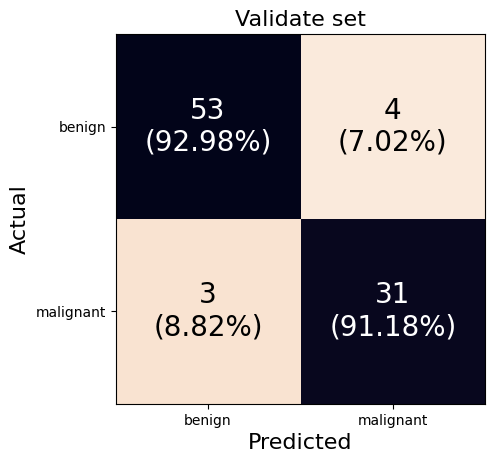

################# test set ##################
Best Threshold=1.000000
FPR: 0.1111
TPR: 0.8095
Confusion Matrix
----------------
[[64  8]
 [ 8 34]] 

----------------
split5
Sensitivity: 80.95%
Specificity: 88.89%
Accuracy: 85.96%
Precision: 80.95%
Sensitivity: 80.95%
Precision: 80.95%
F1: 80.95%


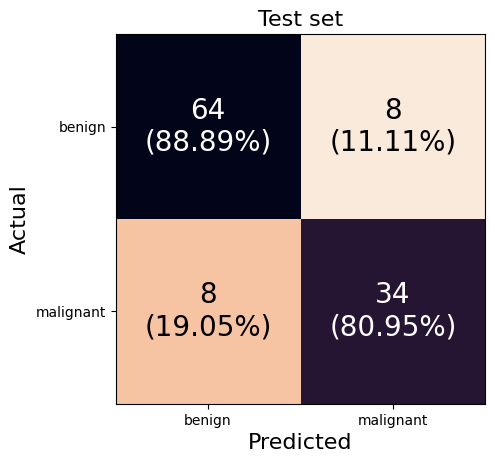

---------------------------------------
AUC validate: 92.08%
AUC test: 84.92%


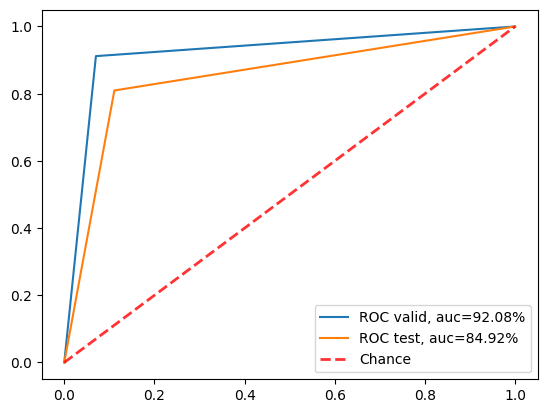

In [1407]:
param5_split5_cm_val, param5_split5_cm_test, param5_split5_AUC_val, param5_split5_AUC_test = evaluate(param,split)

# Overall

param1
split1
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split2
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split3
Sensitivity: 97.06%
Specificity: 98.25%
Accuracy: 97.80%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%

split4
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split5
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

overall
sensitivity: 99.41 ± 1.32%
specificity: 98.25 ± 0.00%
accuracy: 98.68 ± 0.49%
precision: 97.13 ± 0.04%
f1_score: 98.25 ± 0.67%


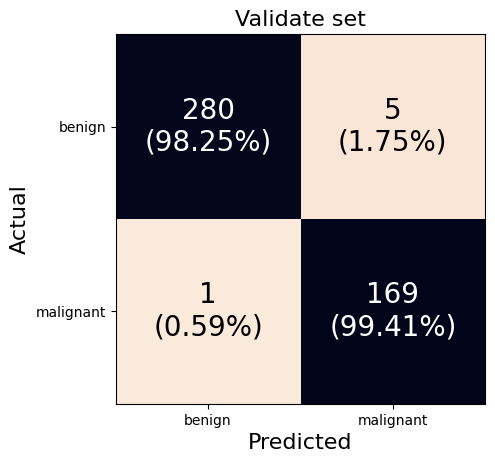

AUC1: 9898.35 ± 83.61%


In [1408]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC1",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)

param2
split1
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split2
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%

split3
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split4
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split5
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

overall
sensitivity: 100.00 ± 0.00%
specificity: 97.89 ± 0.78%
accuracy: 98.68 ± 0.49%
precision: 96.60 ± 1.21%
f1_score: 98.27 ± 0.63%


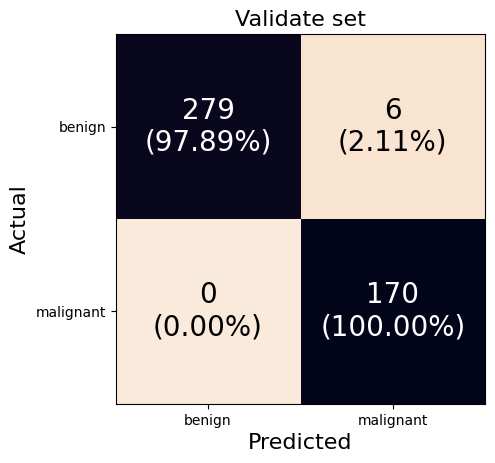

AUC1: 9905.06 ± 14.75%


In [1409]:
print("param2")
plot(param2_split1_cm_val , param2_split2_cm_val , param2_split3_cm_val , param2_split4_cm_val , param2_split5_cm_val)
Mean_SD("AUC1",param2_split1_AUC_val*100, param2_split2_AUC_val*100, param2_split3_AUC_val*100, param2_split4_AUC_val*100, param2_split5_AUC_val*100)

param3
split1
Sensitivity: 97.06%
Specificity: 98.25%
Accuracy: 97.80%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%

split2
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%

split3
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split4
Sensitivity: 97.06%
Specificity: 98.25%
Accuracy: 97.80%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%

split5
Sensitivity: 91.18%
Specificity: 92.98%
Accuracy: 92.31%
Precision: 88.57%
Sensitivity: 91.18%
Precision: 88.57%
F1: 89.86%

overall
sensitivity: 96.47 ± 3.22%
specificity: 97.54 ± 2.66%
accuracy: 97.14 ± 2.76%
precision: 95.97 ± 4.32%
f1_score: 96.21 ± 3.63%


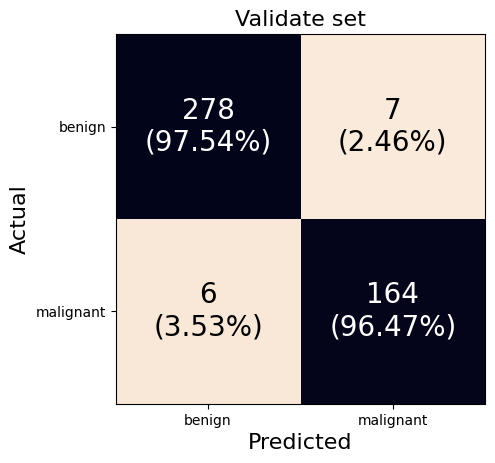

AUC1: 9840.56 ± 73.87%


In [1410]:
print("param3")
plot(param3_split1_cm_val , param3_split2_cm_val , param3_split3_cm_val , param3_split4_cm_val , param5_split5_cm_val)
Mean_SD("AUC1",param3_split1_AUC_val*100, param3_split2_AUC_val*100, param3_split3_AUC_val*100, param3_split4_AUC_val*100, param3_split5_AUC_val*100)

param4
split1
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%

split2
Sensitivity: 100.00%
Specificity: 98.25%
Accuracy: 98.90%
Precision: 97.14%
Sensitivity: 100.00%
Precision: 97.14%
F1: 98.55%

split3
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%

split4
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%

split5
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

overall
sensitivity: 99.41 ± 1.32%
specificity: 96.49 ± 1.24%
accuracy: 97.58 ± 1.20%
precision: 94.43 ± 1.94%
f1_score: 96.85 ± 1.56%


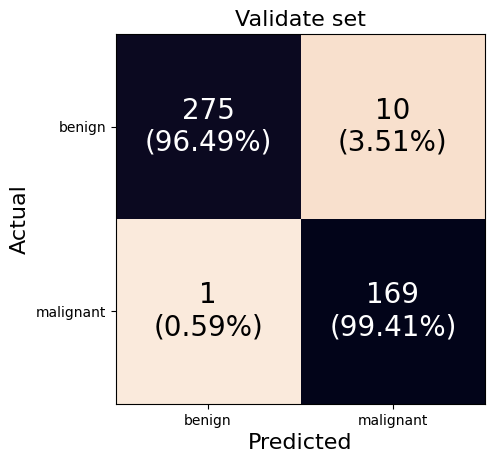

AUC1: 9795.15 ± 120.92%


In [1411]:
print("param4")
plot(param4_split1_cm_val , param4_split2_cm_val , param4_split3_cm_val , param4_split4_cm_val , param4_split5_cm_val)
Mean_SD("AUC1",param4_split1_AUC_val*100, param4_split2_AUC_val*100, param4_split3_AUC_val*100, param4_split4_AUC_val*100, param4_split5_AUC_val*100)

param5
split1
Sensitivity: 97.06%
Specificity: 96.49%
Accuracy: 96.70%
Precision: 94.29%
Sensitivity: 97.06%
Precision: 94.29%
F1: 95.65%

split2
Sensitivity: 97.06%
Specificity: 98.25%
Accuracy: 97.80%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%

split3
Sensitivity: 97.06%
Specificity: 98.25%
Accuracy: 97.80%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%

split4
Sensitivity: 97.06%
Specificity: 96.49%
Accuracy: 96.70%
Precision: 94.29%
Sensitivity: 97.06%
Precision: 94.29%
F1: 95.65%

split5
Sensitivity: 91.18%
Specificity: 92.98%
Accuracy: 92.31%
Precision: 88.57%
Sensitivity: 91.18%
Precision: 88.57%
F1: 89.86%

overall
sensitivity: 95.88 ± 2.63%
specificity: 96.49 ± 2.15%
accuracy: 96.26 ± 2.28%
precision: 94.25 ± 3.47%
f1_score: 95.06 ± 2.99%


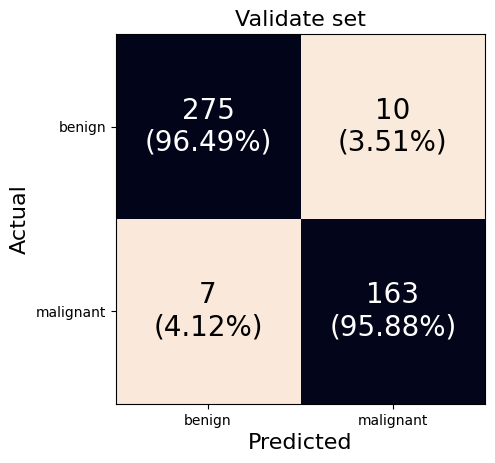

AUC1: 9618.68 ± 233.76%


In [1412]:
print("param5")
plot(param5_split1_cm_val , param5_split2_cm_val , param5_split3_cm_val , param5_split4_cm_val , param5_split5_cm_val)
Mean_SD("AUC1",param5_split1_AUC_val*100, param5_split2_AUC_val*100, param5_split3_AUC_val*100, param5_split4_AUC_val*100, param5_split5_AUC_val*100)